In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=3)

In [2]:
link = 'https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv'
df = pd.read_csv(link, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, 0 to 100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


In [4]:
df = df.replace(99, np.NaN)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [5]:
df = df.drop(columns=[0])
df.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [6]:
n_latent_factors = 4

user_ratings = df.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [7]:
def replace(orig, percentage=0.1, null_value=np.NaN):
    new_data = orig.copy()
    rated = np.where(orig != null_value)
    n_rated = len(rated[0])
    idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
    new_data[rated[0][idx], rated[1][idx]] = null_value
    return new_data, (rated[0][idx], rated[1][idx])

In [8]:
training_data, idx = replace(user_ratings)

In [9]:
idx = np.array(idx)

In [10]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)

In [11]:
def train(user_id, item_id, rating, alpha=0.0001):
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err

In [12]:
calc_mse = lambda arr: (np.array(arr) ** 2).mean()

def train_sgd(alpha):
    error = []
    for user_id in range(latent_user_preferences.shape[0]):
        for item_id in range(latent_item_features.shape[0]):
            rating = training_data[user_id, item_id]
            if not np.isnan(rating):
                err = train(user_id, item_id, rating, alpha)
                error.append(err)
    return calc_mse(error)

def val_sgd():
    error = []
    for index in range(idx.shape[1]):
        user_id = idx[0][index]
        item_id = idx[1][index]
        rating = user_ratings[user_id][item_id]
        if not np.isnan(rating):
            predicted_rating = predict_rating(user_id, item_id)
            error.append(predicted_rating - rating)
    return calc_mse(error)

In [13]:
def sgd(iterations, alpha):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    try:
        for iteration in range(iterations):
            train_sgd(alpha)
            mse = val_sgd()
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration + 1, iterations, mse))
            mse_history.append(mse)
    except KeyboardInterrupt:
        print()
    return mse_history

In [14]:
import matplotlib.pyplot as plt

def train_and_plot(iterations, alpha=0.0001):
    hist = sgd(iterations, alpha)
    plt.figure()
    plt.plot(np.arange(0, 5, 1), hist)
    plt.xlabel("Iterations")
    plt.ylabel("MSE")
    plt.show()

Iteration 1/5:	MSE=25.205655
Iteration 2/5:	MSE=25.052760
Iteration 3/5:	MSE=24.955393
Iteration 4/5:	MSE=24.859147
Iteration 5/5:	MSE=24.761342


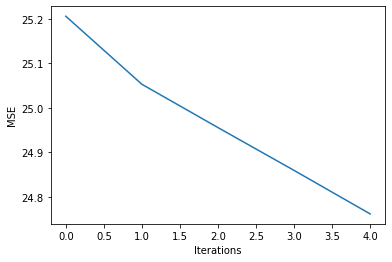

In [15]:
train_and_plot(10)

In [18]:
n_latent_factors = 8

latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

Iteration 1/5:	MSE=24.587825
Iteration 2/5:	MSE=20.945162
Iteration 3/5:	MSE=19.037186
Iteration 4/5:	MSE=18.953305
Iteration 5/5:	MSE=18.883733


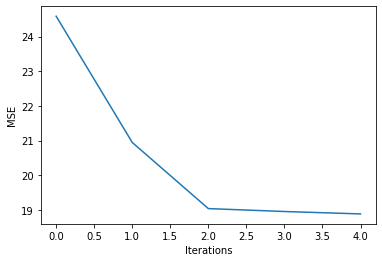

In [19]:
train_and_plot(5, 1e-3)

In [20]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-2.855, -3.638, -4.249, ..., -2.768, -5.121, -3.474],
       [ 2.97 ,  2.363,  2.61 , ...,  1.95 ,  2.999,  2.344],
       [ 7.013,  6.722,  7.395, ...,  7.598,  7.823,  8.261],
       ...,
       [-1.133, -1.854, -1.811, ..., -0.698, -1.788, -1.327],
       [-0.862, -1.699, -1.683, ..., -0.889, -1.981, -1.447],
       [ 2.942,  4.03 ,  3.25 , ...,  5.178,  2.546,  5.413]])

In [21]:
values = [zip(user_ratings[i], predictions[i].round(2)) for i in range(predictions.shape[0])]

In [22]:
comparison_data = pd.DataFrame(values)
comparison_data.columns = df.columns
comparison_data.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -2.86)","(8.79, -3.64)","(-9.66, -4.25)","(-8.16, -7.11)","(-7.52, -3.06)","(-8.5, -3.44)","(-9.85, -3.74)","(4.17, -2.99)","(-8.98, -6.3)","(-4.76, -3.2)",...,"(2.82, -1.68)","(nan, -3.48)","(nan, -0.86)","(nan, -3.88)","(nan, -3.4)","(nan, -3.23)","(-5.63, -2.56)","(nan, -2.77)","(nan, -5.12)","(nan, -3.47)"
1,"(4.08, 2.97)","(-0.29, 2.36)","(6.36, 2.61)","(4.37, 1.67)","(-2.38, 1.8)","(-9.66, 2.69)","(-0.73, 1.86)","(-5.34, 1.29)","(8.88, 2.53)","(9.22, 2.83)",...,"(2.82, 3.42)","(-4.95, 3.15)","(-0.29, 3.6)","(7.86, 4.02)","(-0.19, 3.62)","(-2.14, 3.48)","(3.06, 3.55)","(0.34, 1.95)","(-4.32, 3.0)","(1.07, 2.34)"
2,"(nan, 7.01)","(nan, 6.72)","(nan, 7.39)","(nan, 5.75)","(9.03, 4.91)","(9.27, 7.92)","(9.03, 4.3)","(9.27, 2.49)","(nan, 6.62)","(nan, 7.29)",...,"(nan, 8.54)","(nan, 8.55)","(nan, 8.99)","(9.08, 8.14)","(nan, 8.16)","(nan, 8.5)","(nan, 8.49)","(nan, 7.6)","(nan, 7.82)","(nan, 8.26)"
3,"(nan, 2.03)","(8.35, 2.15)","(nan, 2.04)","(nan, -0.16)","(1.8, 1.36)","(8.16, 2.17)","(-2.82, 1.05)","(6.21, -0.09)","(nan, 0.3)","(1.84, 2.0)",...,"(nan, 2.36)","(nan, 1.76)","(nan, 3.45)","(0.53, 1.47)","(nan, 1.49)","(nan, 2.11)","(nan, 2.29)","(nan, 2.2)","(nan, 0.5)","(nan, 2.77)"
4,"(8.5, 1.9)","(4.61, 2.94)","(-4.17, 1.82)","(-5.39, 0.55)","(1.36, 2.04)","(1.6, 3.52)","(7.04, 1.6)","(4.61, 0.04)","(-0.44, 0.54)","(5.73, 2.21)",...,"(5.19, 4.95)","(5.58, 4.06)","(4.27, 5.79)","(5.19, 2.85)","(5.73, 3.02)","(1.55, 3.68)","(3.11, 3.8)","(6.55, 4.58)","(1.8, 3.0)","(1.6, 3.8)"
